<a href="https://colab.research.google.com/github/nyoons/ESAA/blob/main/%EC%B5%9C%EC%A2%85%EA%B2%B0%EA%B3%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Medical Cost Personal Datasets 
https://www.kaggle.com/datasets/mirichoi0218/insurance

# **1. 라이브러리 및 데이터**

In [1]:
# 기본 모듈 불러오기
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import re
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# 데이터 불러오기
data=pd.read_csv('/content/drive/MyDrive/insurance.csv')

# **2. 탐색적 자료분석(EDA)**

## 1) 데이터 확인

* age: age of primary beneficiary

* sex: insurance contractor gender, female, male

* bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

* children: Number of children covered by health insurance / Number of dependents

* smoker: Smoking

* region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

* charges: Individual medical costs billed by health insurance

In [4]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## 2) 데이터 요약

In [5]:
data.shape

(1338, 7)

In [6]:
data.info() #결측치없음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# **3. 데이터 시각화**

In [8]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

### charges (target)

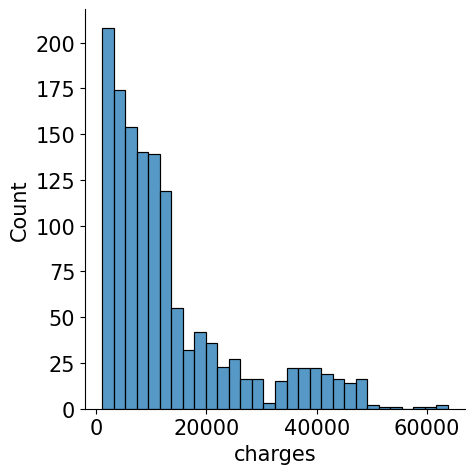

In [9]:
mpl.rc('font', size=15)
sns.displot(data['charges'])

왼쪽으로 편향되어 있으므로 로그 변환

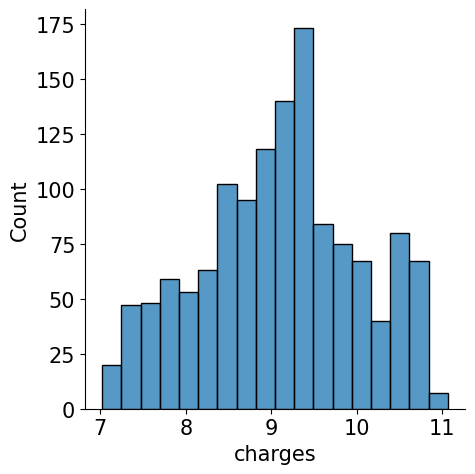

In [10]:
import numpy as np
sns.displot(np.log(data['charges']))

### features

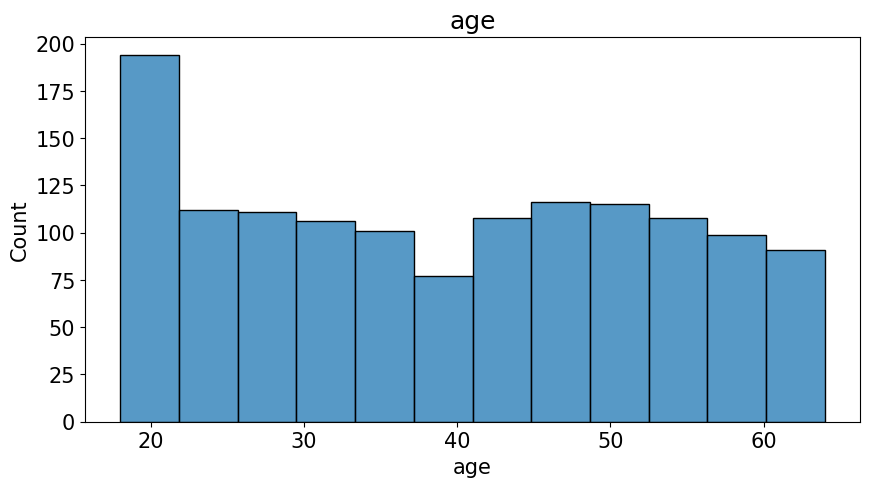

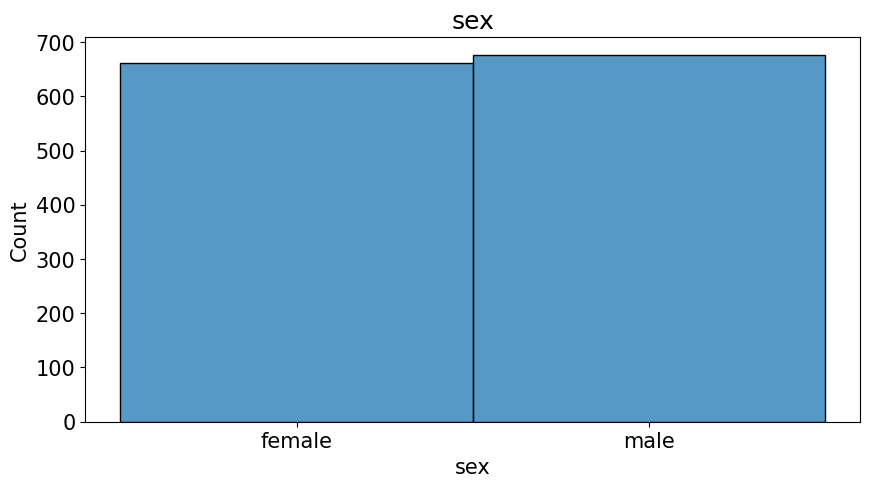

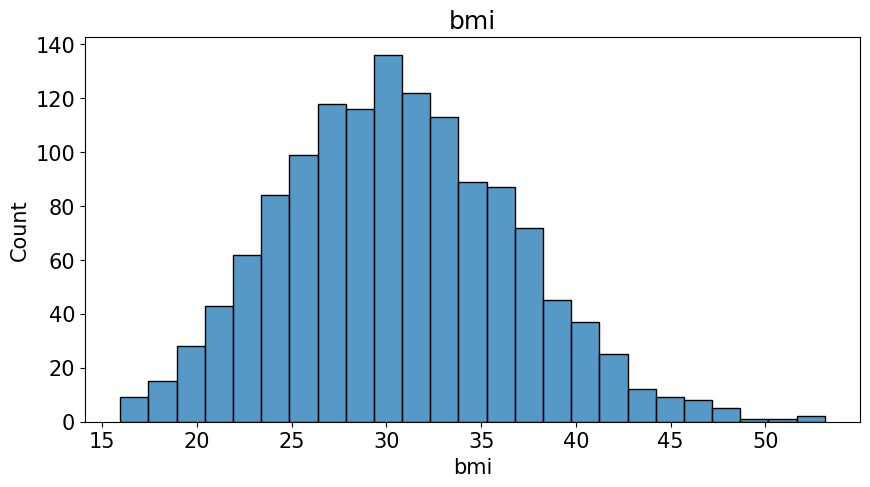

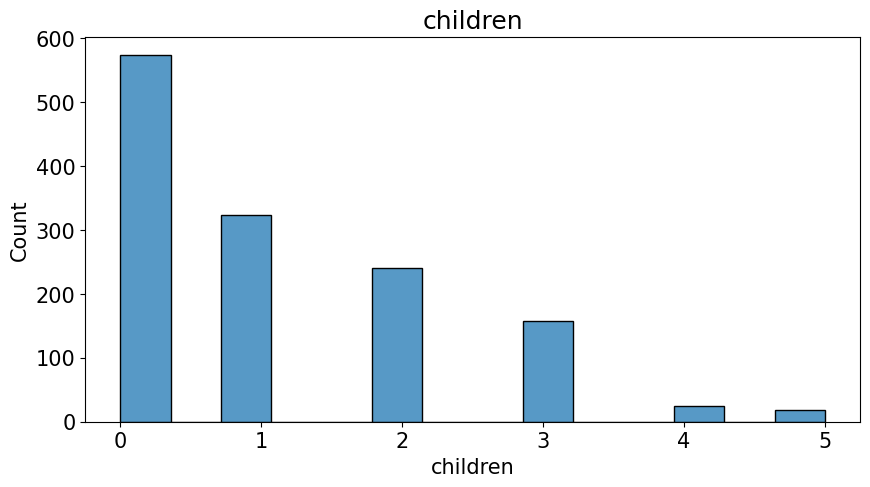

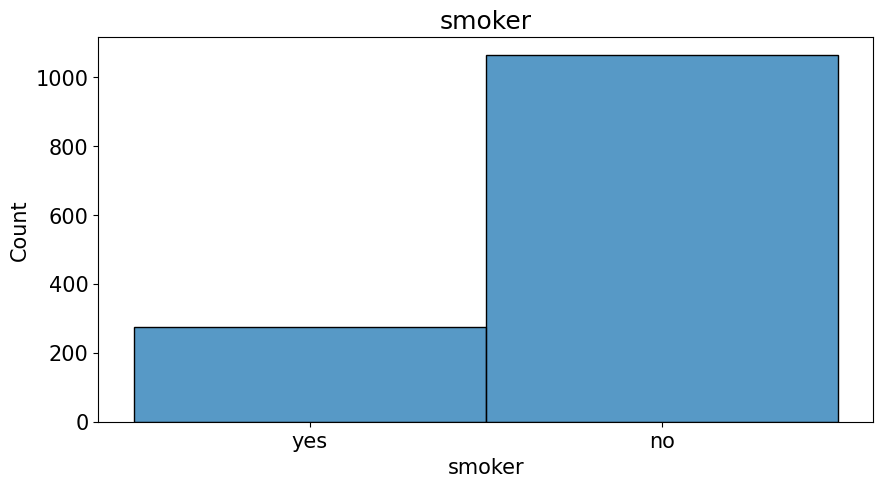

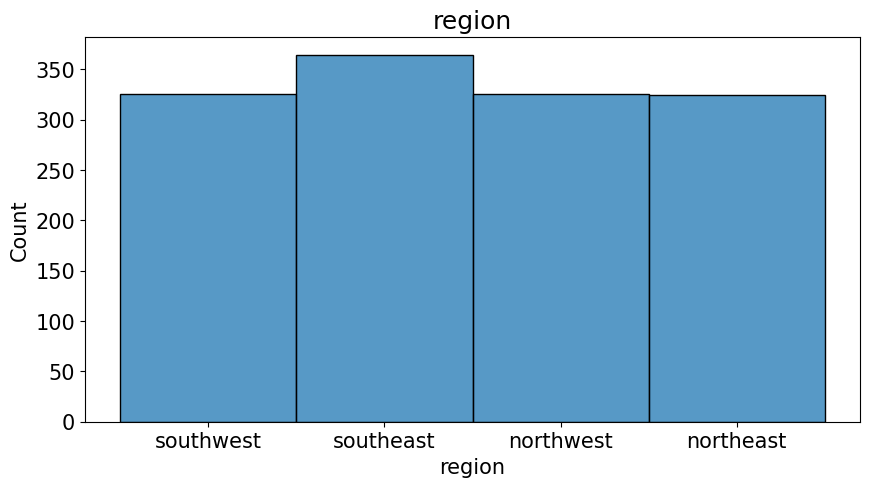

In [11]:
for column in data.columns[:-1]:
    plt.subplots(figsize=(10, 5))
    plt.title(column)
    sns.histplot(data[column])

##pair plot

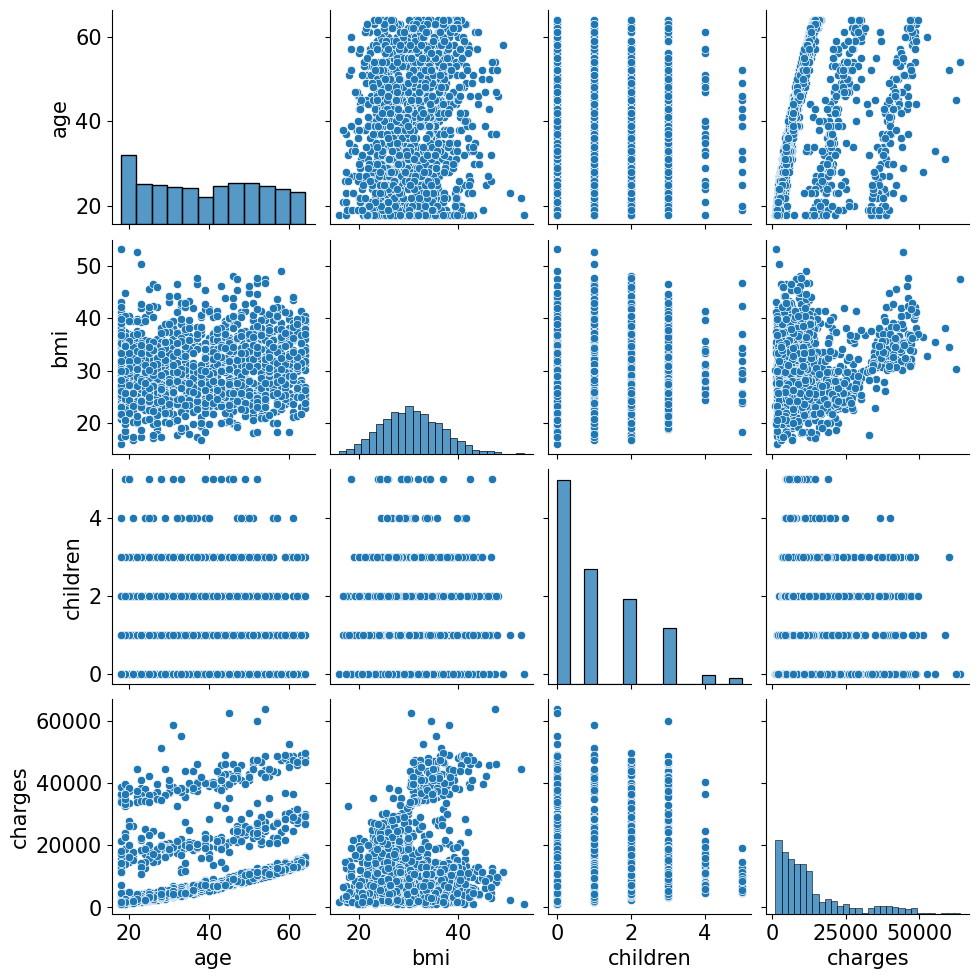

In [12]:
sns.pairplot(data)

## 범주형 변수와 charges의 관계


In [13]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
sex_encoding=le.fit_transform(data.sex)
smoker_encoding=le.fit_transform(data.smoker)
region_encoding=le.fit_transform(data.region)

<Axes: xlabel='sex', ylabel='charges'>

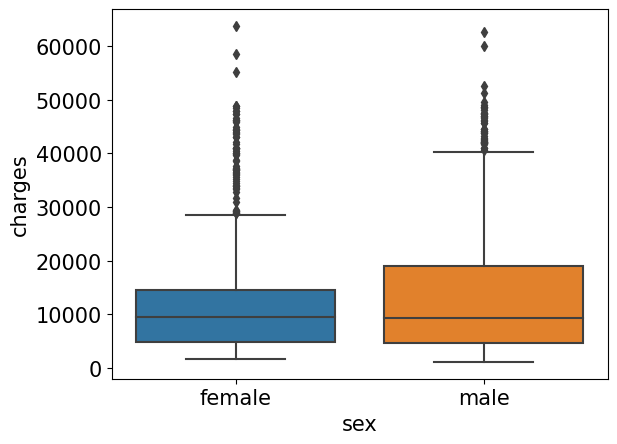

In [14]:
#sex, charges 
sns.boxplot(data, x='sex', y='charges')

<Axes: xlabel='region', ylabel='charges'>

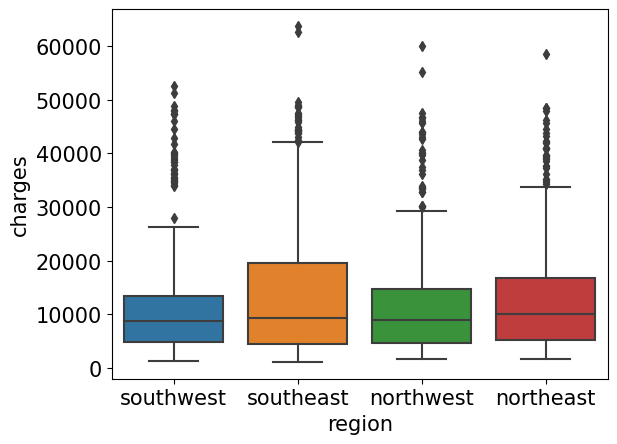

In [15]:
#region, charges 
sns.boxplot(data, x='region', y='charges')

<Axes: xlabel='smoker', ylabel='charges'>

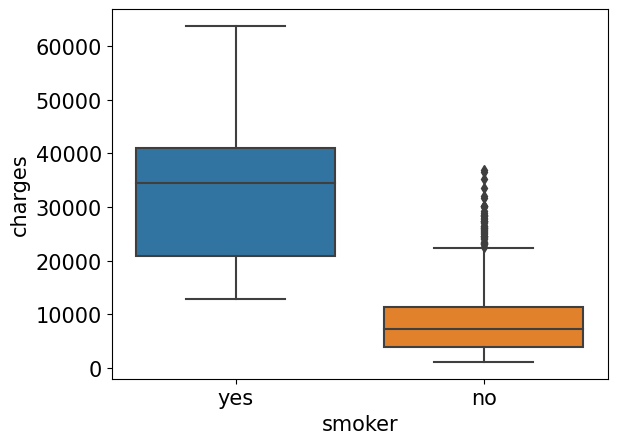

In [16]:
#smoker, charges 
sns.boxplot(data, x='smoker', y='charges')

##charges (target)과 상관관계가 높은 것처럼 보이는 변수
- age
- smoker
- bmi

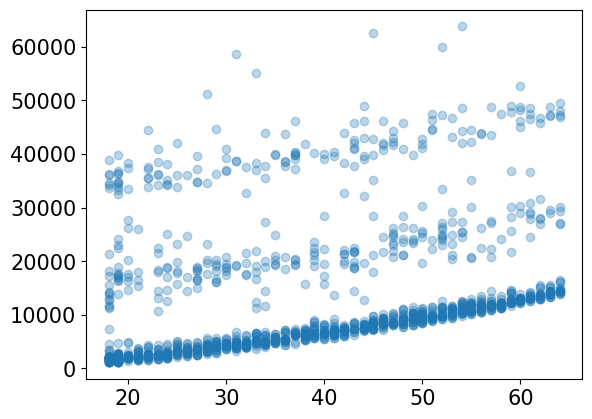

In [17]:
#age, charges 
plt.scatter(data=data, x='age', y='charges', alpha=0.3)

- age와 charges는 양의 상관관계를 보이고 있지만 특이한 계단 형태를 보이고 있으므로 smoker를 색으로 표시하여 세 변수간의 관계를 확인

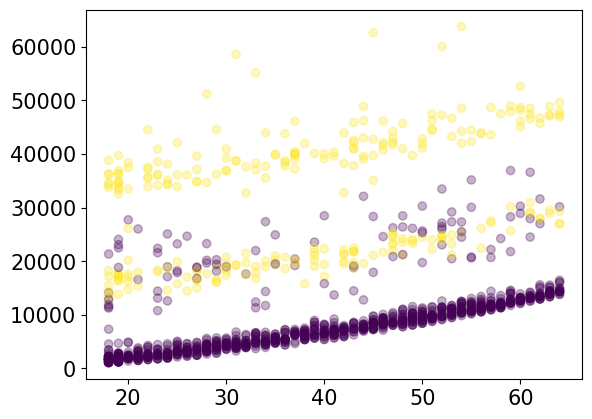

In [18]:
plt.scatter(data=data, x='age', y='charges', c=smoker_encoding, alpha=0.3)

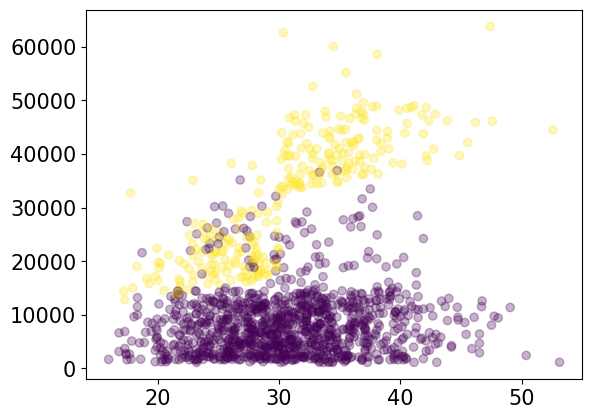

In [19]:
#bmi, charges
plt.scatter(data=data, x='bmi', y='charges', c=smoker_encoding, alpha=0.3)

- bmi와 charges는 또한 smoker 여부에 따라 선형관계가 뚜렷하게 나타난다.

회귀선이 추가된 그래프로 확인해보자.

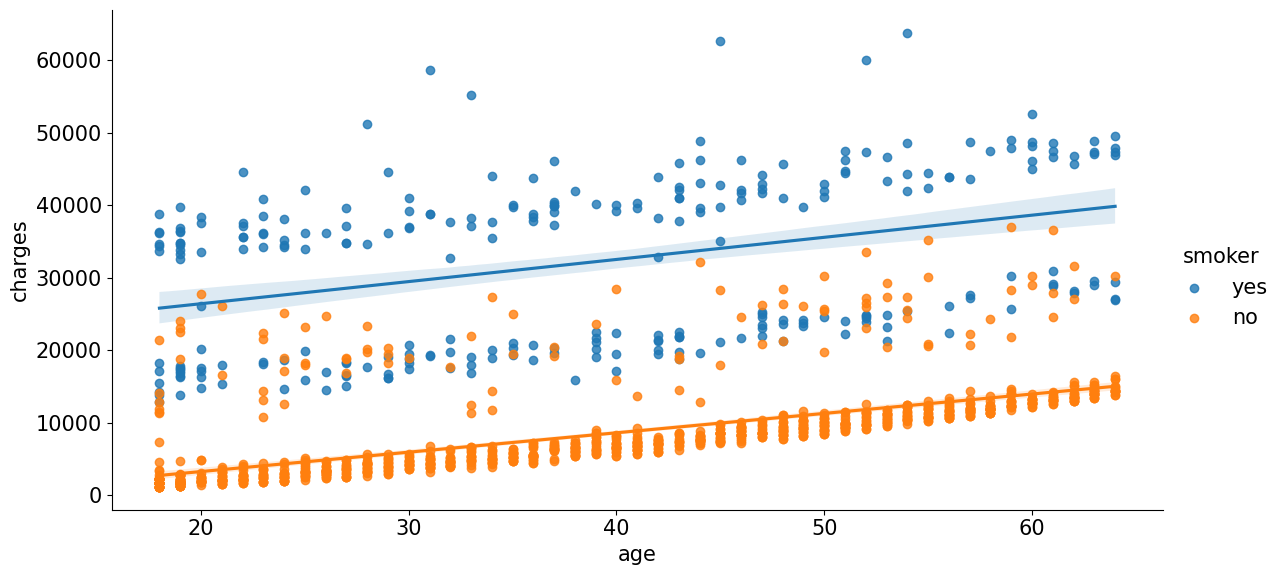

In [20]:
sns.lmplot(x='age',y='charges',data=data,hue='smoker', aspect=2,height=6)

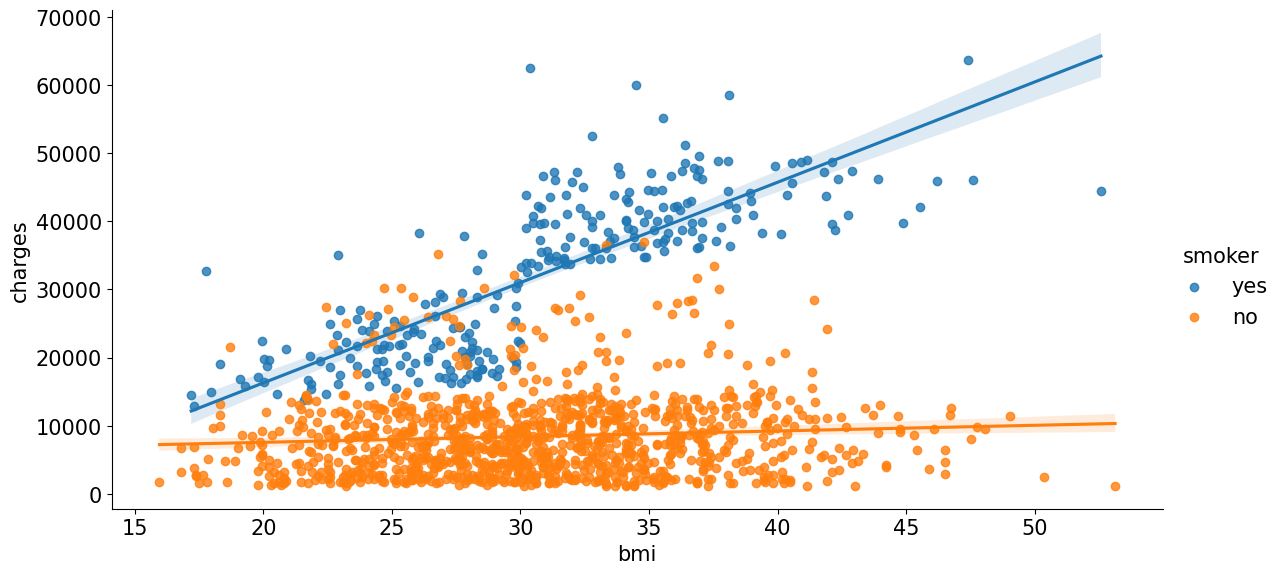

In [21]:
sns.lmplot(x='bmi',y='charges',data=data,hue='smoker', aspect=2,height=6)

## heatmap

In [22]:
data.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


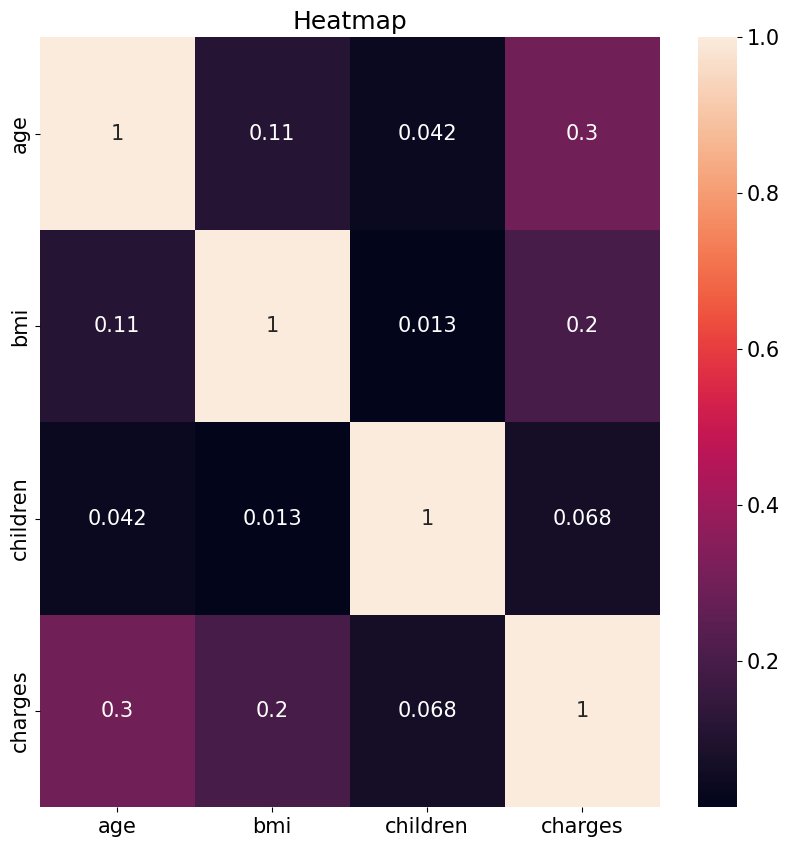

In [23]:
corrMat = data.corr() 
fig, ax= plt.subplots() 
fig.set_size_inches(10, 10)
sns.heatmap(corrMat, annot=True)
ax.set(title='Heatmap');

## one-hot encoding

In [24]:
data=pd.read_csv('/content/drive/MyDrive/insurance.csv')

In [25]:
data=pd.get_dummies(data)

In [26]:
data['charges']=np.log(data.charges)

In [27]:
data.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,9.734176,1,0,0,1,0,0,0,1
1,18,33.770,1,7.453302,0,1,1,0,0,0,1,0
2,28,33.000,3,8.400538,0,1,1,0,0,0,1,0
3,33,22.705,0,9.998092,0,1,1,0,0,1,0,0
4,32,28.880,0,8.260197,0,1,1,0,0,1,0,0


# **4. 데이터 나누기**

In [28]:
y=data.charges
X=data.drop('charges',axis=1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=10)

In [29]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1070, 11) (268, 11) (1070,) (268,)


# **5. 모델 적합**

In [30]:
from sklearn.linear_model import ElasticNet, Ridge, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.tree import DecisionTreeRegressor

In [31]:
from sklearn.metrics import r2_score

In [32]:
from sklearn.model_selection import GridSearchCV

def print_best_params(model, params):
  grid_model = GridSearchCV(model, param_grid=params, scoring="neg_mean_squared_error", cv=5)
  grid_model.fit(X, y)
  rmse = np.sqrt(-1*grid_model.best_score_)
  print('{0} 5 CV 시 최적 alpha:{1}'.format(model.__class__.__name__, grid_model.best_params_))

* DecisionTree

In [33]:
dt=DecisionTreeRegressor()
dt.fit(X_train,y_train)
pred=dt.predict(X_test)
print('R2 test data: %.3f' % (r2_score(y_test,pred)))

R2 test data: 0.657


In [34]:
dt_params = {'max_depth': [1,2,3,4,5,6,7]}
print_best_params(dt, dt_params)

DecisionTreeRegressor 5 CV 시 최적 alpha:{'max_depth': 4}


In [35]:
dt_grid = DecisionTreeRegressor(max_depth=4)
dt_grid.fit(X_train, y_train)
pred= dt_grid.predict(X_test)
print('R2 test data: %.3f' % (r2_score(y_test,pred)))

R2 test data: 0.782


* Ridge

In [36]:
ridge_reg = Ridge(alpha=12)
ridge_reg.fit(X_train, y_train)
pred = ridge_reg.predict(X_test)
print('R2 test data: %.3f' % (r2_score(y_test,pred)))

R2 test data: 0.707


In [37]:
ridge_params={'alpha':[0.05, 0.1, 1, 5, 8, 10, 12, 15, 20]}
print_best_params(ridge_reg, ridge_params)

Ridge 5 CV 시 최적 alpha:{'alpha': 0.1}


In [38]:
ridge_reg_grid = Ridge(alpha=0.1)
ridge_reg_grid.fit(X_train, y_train)
pred = ridge_reg_grid.predict(X_test)
print('R2 test data: %.3f' % (r2_score(y_test,pred)))

R2 test data: 0.706


* Lasso

In [39]:
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X_train, y_train)
pred = lasso_reg.predict(X_test)
print('R2 test data: %.3f' % (r2_score(y_test,pred)))

R2 test data: 0.623


In [40]:
lasso_params={'alpha':[0.001, 0.005, 0.008, 0.03, 0.05, 0.1, 0.5, 1, 5 ,10]}
print_best_params(lasso_reg, lasso_params)

Lasso 5 CV 시 최적 alpha:{'alpha': 0.001}


In [41]:
lasso_reg_grid = Lasso(alpha=0.001)
lasso_reg_grid.fit(X_train, y_train)
pred = lasso_reg_grid.predict(X_test)
print('R2 test data: %.3f' % (r2_score(y_test,pred)))

R2 test data: 0.705


* Elastic Net

In [42]:
ENet_reg = ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3)
ENet_reg.fit(X_train, y_train)
pred = ENet_reg.predict(X_test)
print('R2 test data: %.3f' % (r2_score(y_test,pred)))

R2 test data: 0.705


* Kernel Ridge

In [43]:
KRR_reg = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)
KRR_reg.fit(X_train, y_train)
pred = KRR_reg.predict(X_test)
print('R2 test data: %.3f' % (r2_score(y_test,pred)))

R2 test data: 0.784


* Gradient Boosting

In [44]:
GBoost_reg = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)
GBoost_reg.fit(X_train, y_train)
pred = GBoost_reg.predict(X_test)
print('R2 test data: %.3f' % (r2_score(y_test,pred)))

R2 test data: 0.772


In [45]:
GBoost_params = { 'n_estimators' : [300,500,1000]}
print_best_params(GBoost_reg, GBoost_params)

GradientBoostingRegressor 5 CV 시 최적 alpha:{'n_estimators': 500}


In [46]:
GBoost_grid = GradientBoostingRegressor(n_estimators=500, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)
GBoost_grid.fit(X_train, y_train)
pred = GBoost_grid.predict(X_test)
print('R2 test data: %.3f' % (r2_score(y_test,pred)))

R2 test data: 0.773


* XGBoost

In [47]:
xgb_reg = XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, random_state =7, nthread = -1)
xgb_reg.fit(X_train, y_train)
pred = xgb_reg.predict(X_test)
print('R2 test data: %.3f' % (r2_score(y_test,pred)))

R2 test data: 0.750


In [48]:
xgb_params = {'n_estimators': [100, 150, 300]}
print_best_params(xgb_reg, xgb_params)

XGBRegressor 5 CV 시 최적 alpha:{'n_estimators': 150}


In [49]:
xgb_reg_grid = XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=150,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, random_state =7, nthread = -1)
xgb_reg_grid.fit(X_train, y_train)
pred = xgb_reg_grid.predict(X_test)
print('R2 test data: %.3f' % (r2_score(y_test,pred)))

R2 test data: 0.776


* LightGBM

In [50]:
lgb_reg = LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)
lgb_reg.fit(X_train, y_train)
pred = lgb_reg.predict(X_test)
print('R2 test data: %.3f' % (r2_score(y_test,pred)))

[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
R2 test data: 0.775


In [51]:
lgb_params = {'n_estimators':[100, 300, 500, 1000, 2000, 3000, 5000]}
print_best_params(lgb_reg, lgb_params)

[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6

In [52]:
lgb_reg_grid = LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=500,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)
lgb_reg_grid.fit(X_train, y_train)
pred = lgb_reg_grid.predict(X_test)
print('R2 test data: %.3f' % (r2_score(y_test,pred)))

R2 test data: 0.777


* RandomForest

In [53]:
rf_reg = RandomForestRegressor(max_depth= 6, min_samples_leaf= 8, min_samples_split= 20, n_estimators= 1000, random_state=0)
rf_reg.fit(X_train, y_train)
pred = rf_reg.predict(X_test)
print('R2 test data: %.3f' % (r2_score(y_test,pred)))

R2 test data: 0.791


random forest, kernel ridge, decision tree로 결정

##추가 전처리

Feature importance ranking


1.smoker_yes(0.411764)
2.age(0.410519)
3.smoker_no(0.095943)
4.bmi(0.040072)
5.children(0.031559)
6.region_northeast(0.003749)
7.sex_male(0.002091)
8.sex_female(0.001923)
9.region_southeast(0.001027)
10.region_northwest(0.000747)
11.region_southwest(0.000605)


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, 'smoker_yes'),
  Text(1, 0, 'age'),
  Text(2, 0, 'smoker_no'),
  Text(3, 0, 'bmi'),
  Text(4, 0, 'children'),
  Text(5, 0, 'region_northeast'),
  Text(6, 0, 'sex_male'),
  Text(7, 0, 'sex_female'),
  Text(8, 0, 'region_southeast'),
  Text(9, 0, 'region_northwest'),
  Text(10, 0, 'region_southwest')])

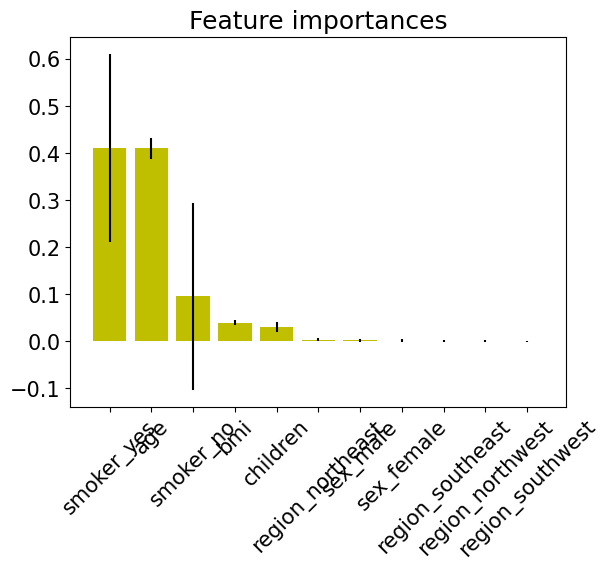

In [54]:
print('Feature importance ranking\n\n')
importances = rf_reg.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf_reg.estimators_],axis=0)
indices = np.argsort(importances)[::-1]
variables = ['age', 'bmi', 'children', 'sex_female',	'sex_male',	'smoker_no',	'smoker_yes',	'region_northeast',	'region_northwest',	'region_southeast',	'region_southwest']
importance_list = []
for f in range(X.shape[1]):
    variable = variables[indices[f]]
    importance_list.append(variable)
    print("%d.%s(%f)" % (f + 1, variable, importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(importance_list, importances[indices],
       color="y", yerr=std[indices], align="center")
plt.xticks(rotation=45)

중요하지 않은 피처를 drop 하고 새로 데이터를 만들자.

In [55]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

x = data.drop(['charges', 'region_southwest', 'region_northwest'], axis = 1)
y = data.charges
pol = PolynomialFeatures (degree = 2)
x_pol = pol.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x_pol, y, test_size=0.2, random_state=0)

##하이퍼 파라미터 튜닝

- random forest

In [56]:
rf_params = {'n_estimators' : [90, 100, 110],
           'max_depth' : [5, 6, 8],
           'min_samples_leaf' : [10, 12, 14],
           'min_samples_split' : [7, 8, 10],
            }

rf_reg = RandomForestRegressor(random_state = 0, n_jobs = -1)
grid_cv = GridSearchCV(rf_reg, param_grid = rf_params, cv = 5, n_jobs = -1)
grid_cv.fit(x_train, y_train)
print('최적 하이퍼 파라미터: ', grid_cv.best_params_)

최적 하이퍼 파라미터:  {'max_depth': 5, 'min_samples_leaf': 10, 'min_samples_split': 7, 'n_estimators': 110}


In [57]:
rf_reg=RandomForestRegressor(max_depth=6, min_samples_leaf=12, min_samples_split=8, n_estimators=100, random_state=0, n_jobs=-1)
rf_reg.fit(x_train, y_train)
rf_pred=rf_reg.predict(x_test)
print('하이퍼 파라미터 튜닝 R2 test data: %.3f' % (r2_score(y_test,rf_pred)))

하이퍼 파라미터 튜닝 R2 test data: 0.876


- decision tree

In [58]:
dt_params = {
    'max_depth' : [1,2,3,4,5,6, 8, 10, 12, 16],
    'min_samples_split' : [4,8,12,16, 20, 24]
}
dt_reg=DecisionTreeRegressor()
grid_cv = GridSearchCV(dt_reg, param_grid=dt_params, scoring='r2', cv=5, verbose=1)
grid_cv.fit(x_train, y_train)
print('GridSearchCV 최적 하이퍼파라미터: ', grid_cv.best_params_)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
GridSearchCV 최적 하이퍼파라미터:  {'max_depth': 4, 'min_samples_split': 4}


In [59]:
dt_reg=DecisionTreeRegressor(max_depth=4, min_samples_split=4, random_state=0)
dt_reg.fit(x_train, y_train)
dt_pred=dt_reg.predict(x_test)
print('하이퍼 파라미터 튜닝 R2 test data: %.3f' % (r2_score(y_test,dt_pred)))

하이퍼 파라미터 튜닝 R2 test data: 0.849


- kernel ridge

In [60]:
krr_params = {'alpha' : [0.01, 0.1, 0.3, 0.5, 0.7],
              'degree' : [2,3,4,5]
            }

krr_reg = KernelRidge(kernel='polynomial')
grid_cv = GridSearchCV(krr_reg, param_grid = krr_params, cv = 5, n_jobs = -1)
grid_cv.fit(x_train, y_train)
print('최적 하이퍼 파라미터: ', grid_cv.best_params_)

최적 하이퍼 파라미터:  {'alpha': 0.7, 'degree': 2}


In [61]:
krr_reg=KernelRidge(alpha=0.7, degree=2, kernel='polynomial', coef0=2.5)
krr_reg.fit(x_train, y_train)
krr_pred=krr_reg.predict(x_test)
print('하이퍼 파라미터 튜닝 R2 test data: %.3f' % (r2_score(y_test,krr_pred)))

하이퍼 파라미터 튜닝 R2 test data: 0.856


#**최종 결과**

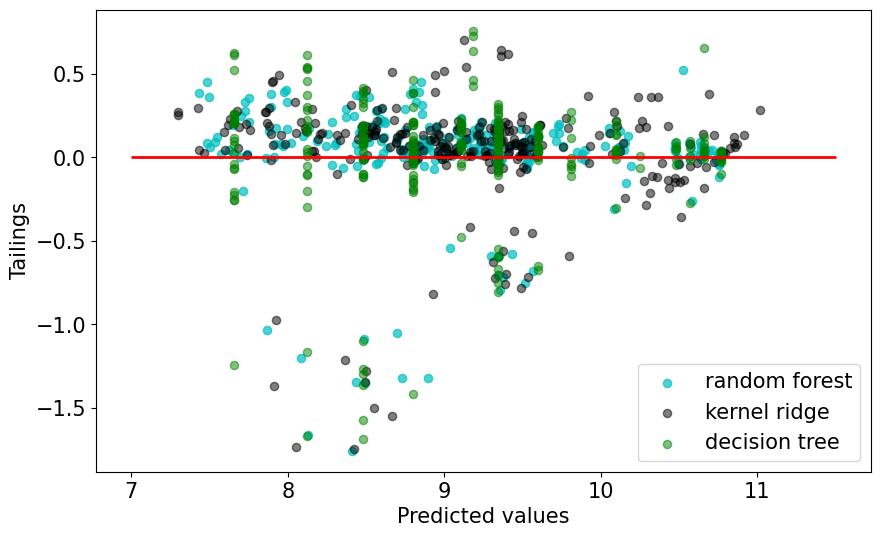

In [62]:
plt.figure(figsize=(10,6))
plt.scatter(rf_pred,rf_pred - y_test, c = 'c', marker = 'o', s = 35, alpha = 0.7, label = 'random forest')
plt.scatter(krr_pred, krr_pred-y_test, c='black', marker='o', s=35, alpha=0.5, label='kernel ridge')
plt.scatter(dt_pred, dt_pred-y_test, c='g', marker='o', s=35, alpha=0.5, label='decision tree')
plt.hlines(y = 0, xmin = 7, xmax = 11.5, lw = 2, color = 'red')
plt.legend(loc = 'lower right')
plt.xlabel('Predicted values')
plt.ylabel('Tailings')
plt.show()

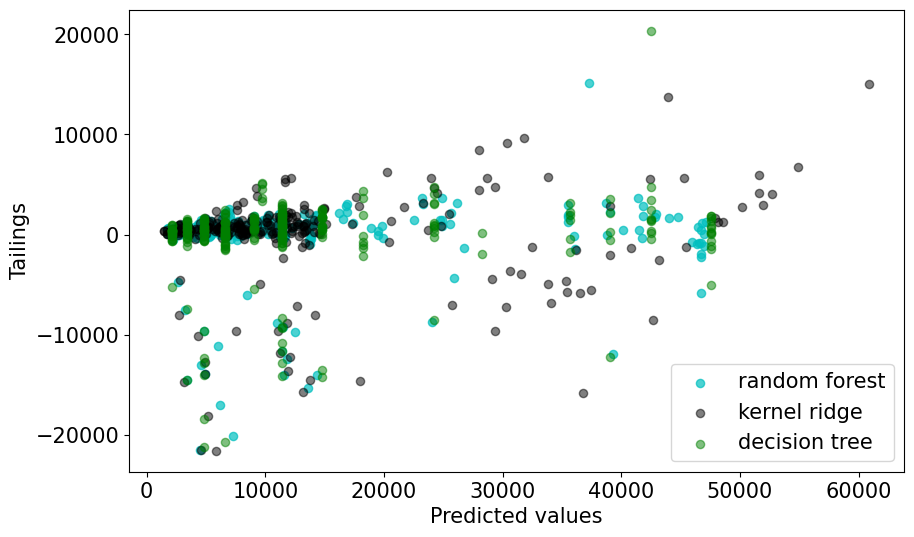

In [63]:
plt.figure(figsize=(10,6))
plt.scatter(np.expm1(rf_pred), np.expm1(rf_pred) - np.expm1(y_test), c = 'c', marker = 'o', s = 35, alpha = 0.7, label = 'random forest')
plt.scatter(np.expm1(krr_pred), np.expm1(krr_pred)-np.expm1(y_test), c='black', marker='o', s=35, alpha=0.5, label='kernel ridge')
plt.scatter(np.expm1(dt_pred), np.expm1(dt_pred)-np.expm1(y_test), c='g', marker='o', s=35, alpha=0.5, label='decision tree')
plt.legend(loc = 'lower right')
plt.xlabel('Predicted values')
plt.ylabel('Tailings')
plt.show()

In [65]:
print('Random Forest의 R2 score: %.3f' % (r2_score(y_test,rf_pred)))

Random Forest의 R2 score: 0.876


In [66]:
def rmse(y, y_pred):
  return np.sqrt(mean_squared_error(y, y_pred))

print('Random Forest의 rmse', rmse(np.expm1(y_test), np.expm1(rf_pred)))

Random Forest의 rmse 3938.9209804666875
